In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

results_path = os.path.join('..', 'results', 'nested_cv_results.csv')
df = pd.read_csv(results_path)

print("Results loaded:")
print(df.shape)
print("\nDatasets:", df['dataset'].unique())
print("Estimators:", df['estimator'].unique())

Results loaded:
(15, 22)

Datasets: ['Housing' 'Student_Performance' 'Spotify']
Estimators: ['XGBoost' 'sklearn_DecisionTree' 'sklearn_RandomForest'
 'Our_RegressionTree' 'Our_RandomForest']


## performance comparison across datasets

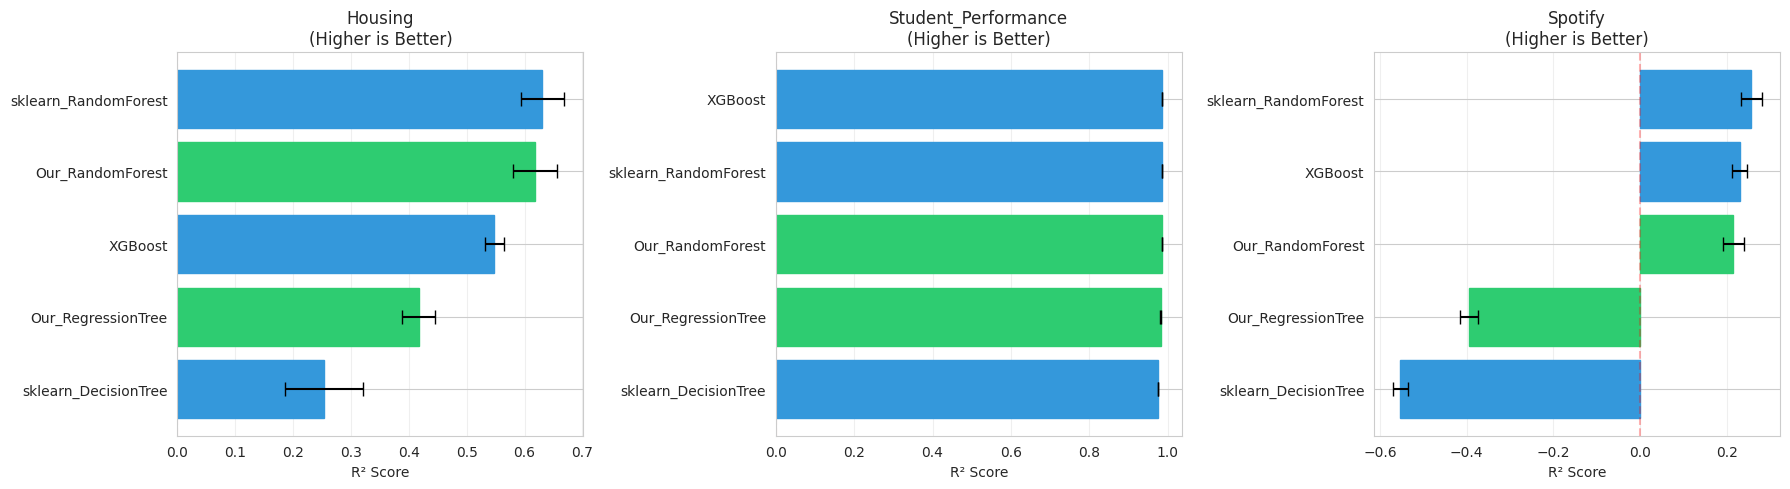

Best R² scores per dataset:
                dataset             estimator   r2_mean    r2_std
2               Housing  sklearn_RandomForest  0.630893  0.037314
12              Spotify  sklearn_RandomForest  0.256488  0.023798
5   Student_Performance               XGBoost  0.986159  0.000221


In [ ]:
# r² score comparison (higher is better)
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for idx, dataset in enumerate(df['dataset'].unique()):
    data = df[df['dataset'] == dataset]
    ax = axes[idx]
    
    data_sorted = data.sort_values('r2_mean', ascending=True)
    
    bars = ax.barh(data_sorted['estimator'], data_sorted['r2_mean'], 
                   xerr=data_sorted['r2_std'], capsize=5)
    
    colors = ['#2ecc71' if 'Our' in est else '#3498db' for est in data_sorted['estimator']]
    for bar, color in zip(bars, colors):
        bar.set_color(color)
    
    ax.set_xlabel('R² Score')
    ax.set_title(f'{dataset}\n(higher is better)')
    ax.axvline(x=0, color='red', linestyle='--', alpha=0.3)
    ax.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.savefig('../results/r2_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print("best r² scores per dataset:")
print(df.loc[df.groupby('dataset')['r2_mean'].idxmax()][['dataset', 'estimator', 'r2_mean', 'r2_std']])

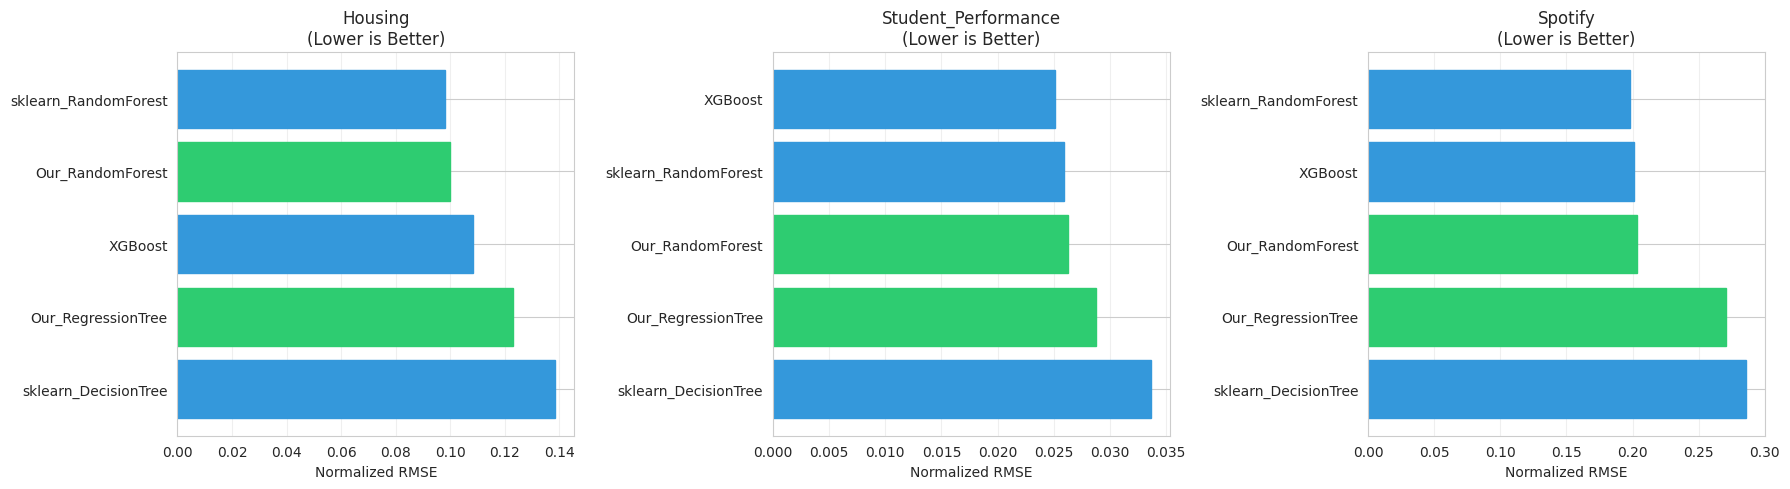


Best NRMSE scores per dataset:
                dataset             estimator     nrmse
2               Housing  sklearn_RandomForest  0.098140
12              Spotify  sklearn_RandomForest  0.197802
5   Student_Performance               XGBoost  0.025110


In [ ]:
# nrmse comparison (lower is better)
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for idx, dataset in enumerate(df['dataset'].unique()):
    data = df[df['dataset'] == dataset]
    ax = axes[idx]
    
    data_sorted = data.sort_values('nrmse', ascending=False)
    
    bars = ax.barh(data_sorted['estimator'], data_sorted['nrmse'])
    
    colors = ['#2ecc71' if 'Our' in est else '#3498db' for est in data_sorted['estimator']]
    for bar, color in zip(bars, colors):
        bar.set_color(color)
    
    ax.set_xlabel('normalized RMSE')
    ax.set_title(f'{dataset}\n(lower is better)')
    ax.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.savefig('../results/nrmse_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nbest nrmse scores per dataset:")
print(df.loc[df.groupby('dataset')['nrmse'].idxmin()][['dataset', 'estimator', 'nrmse']])

## efficiency: time performance

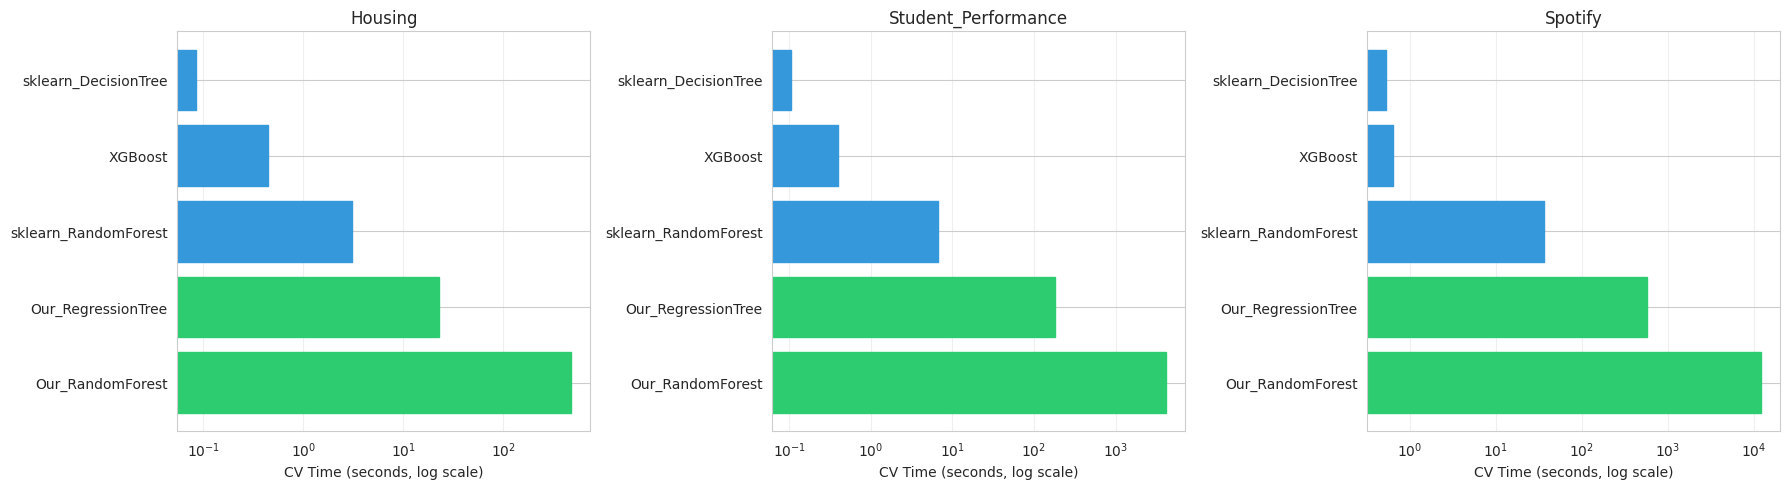

CV Time Statistics (seconds):
                             mean          std         min           max
estimator                                                               
sklearn_DecisionTree     0.241615     0.253724    0.084650      0.534334
XGBoost                  0.489891     0.128635    0.395500      0.636408
sklearn_RandomForest    15.358113    18.308171    3.033438     36.395461
Our_RegressionTree     260.909828   288.198429   22.871446    581.328202
Our_RandomForest      5646.604146  6039.371149  476.996500  12284.847430


In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for idx, dataset in enumerate(df['dataset'].unique()):
    data = df[df['dataset'] == dataset]
    ax = axes[idx]
    
    data_sorted = data.sort_values('cv_time_seconds', ascending=False)
    
    bars = ax.barh(data_sorted['estimator'], data_sorted['cv_time_seconds'])
    
    colors = ['#2ecc71' if 'Our' in est else '#3498db' for est in data_sorted['estimator']]
    for bar, color in zip(bars, colors):
        bar.set_color(color)
    
    ax.set_xlabel('CV time (seconds, log scale)')
    ax.set_xscale('log')
    ax.set_title(f'{dataset}')
    ax.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.savefig('../results/cv_time_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print("cv time statistics (seconds):")
print(df.groupby('estimator')['cv_time_seconds'].agg(['mean', 'std', 'min', 'max']).sort_values('mean'))

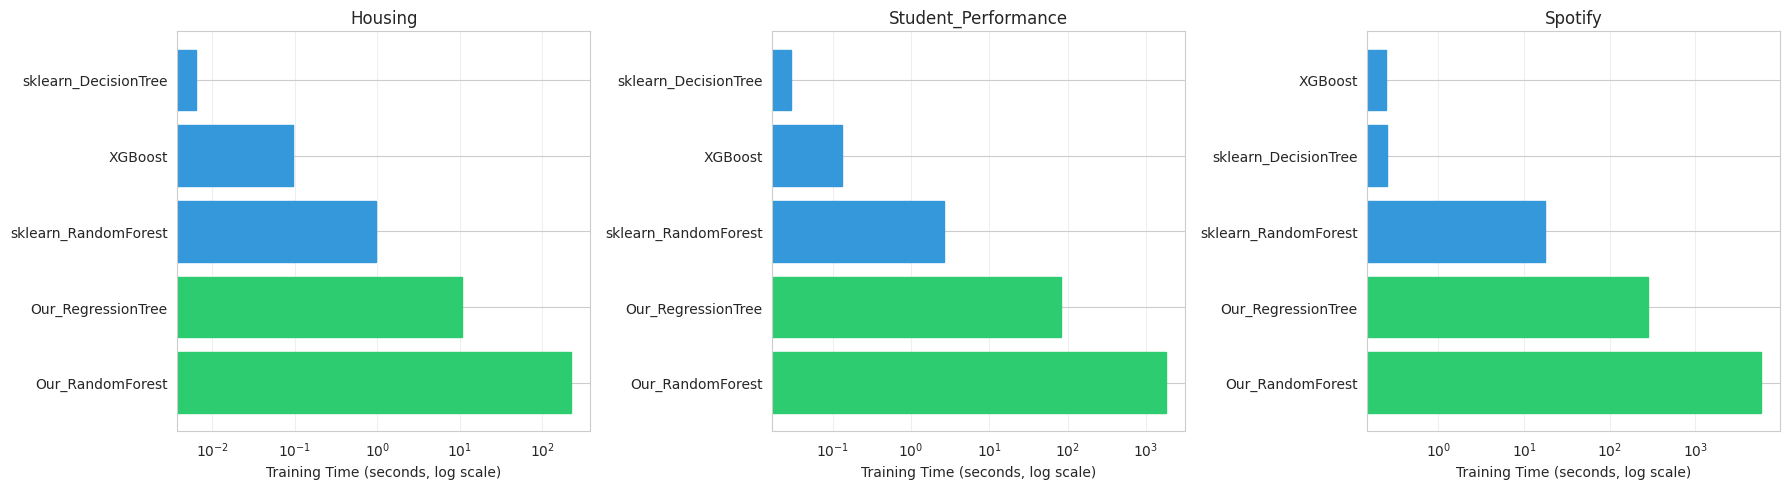

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for idx, dataset in enumerate(df['dataset'].unique()):
    data = df[df['dataset'] == dataset]
    ax = axes[idx]
    
    data_sorted = data.sort_values('train_time_seconds', ascending=False)
    
    bars = ax.barh(data_sorted['estimator'], data_sorted['train_time_seconds'])
    
    colors = ['#2ecc71' if 'Our' in est else '#3498db' for est in data_sorted['estimator']]
    for bar, color in zip(bars, colors):
        bar.set_color(color)
    
    ax.set_xlabel('training time (seconds, log scale)')
    ax.set_xscale('log')
    ax.set_title(f'{dataset}')
    ax.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.savefig('../results/train_time_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

## efficiency: memory usage

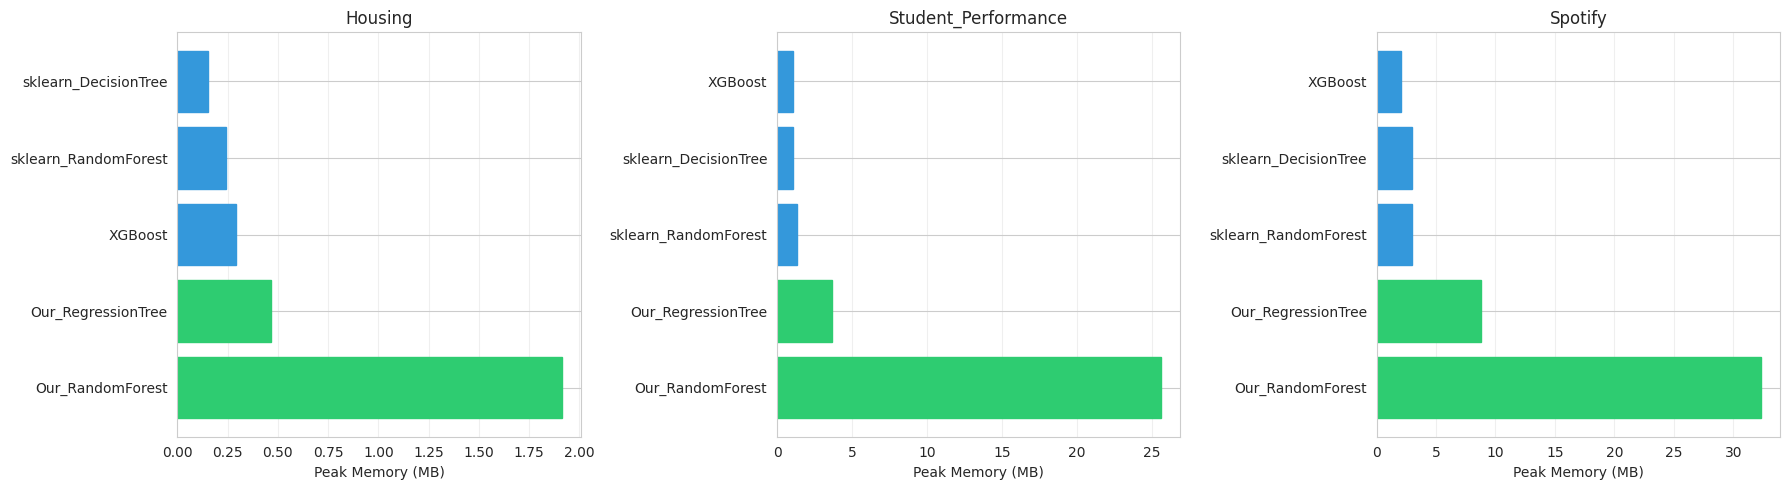

Memory Usage Statistics (MB):
                           mean        std       min        max
estimator                                                      
XGBoost                1.127797   0.860419  0.290709   2.009789
sklearn_DecisionTree   1.399475   1.421755  0.154308   2.948642
sklearn_RandomForest   1.511198   1.378090  0.243765   2.978186
Our_RegressionTree     4.311093   4.190549  0.463671   8.776202
Our_RandomForest      19.954500  15.979565  1.912098  32.322387


In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for idx, dataset in enumerate(df['dataset'].unique()):
    data = df[df['dataset'] == dataset]
    ax = axes[idx]
    
    data_sorted = data.sort_values('cv_memory_mb', ascending=False)
    
    bars = ax.barh(data_sorted['estimator'], data_sorted['cv_memory_mb'])
    
    colors = ['#2ecc71' if 'Our' in est else '#3498db' for est in data_sorted['estimator']]
    for bar, color in zip(bars, colors):
        bar.set_color(color)
    
    ax.set_xlabel('peak memory (MB)')
    ax.set_title(f'{dataset}')
    ax.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.savefig('../results/memory_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print("memory usage statistics (MB):")
print(df.groupby('estimator')['cv_memory_mb'].agg(['mean', 'std', 'min', 'max']).sort_values('mean'))

## performance vs efficiency trade-off

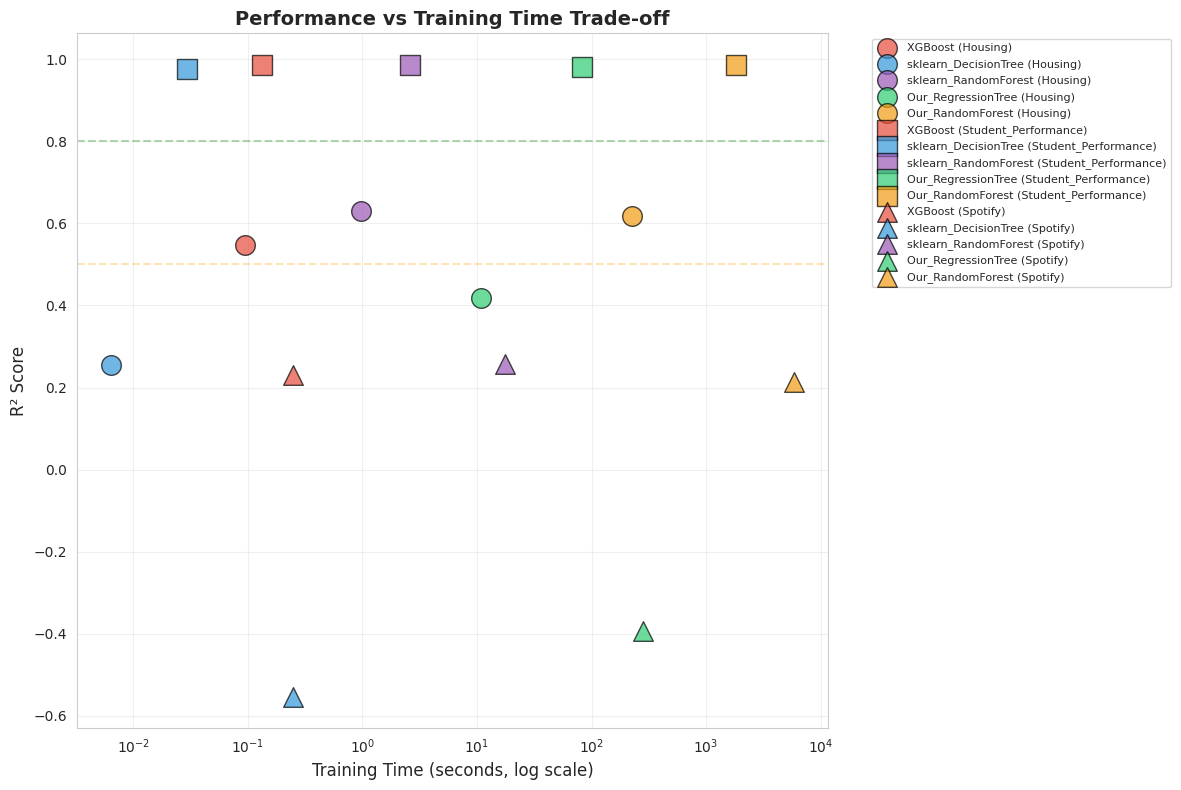

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

datasets = df['dataset'].unique()
markers = ['o', 's', '^']
colors_map = {'XGBoost': '#e74c3c', 
              'sklearn_DecisionTree': '#3498db', 
              'sklearn_RandomForest': '#9b59b6',
              'Our_RegressionTree': '#2ecc71',
              'Our_RandomForest': '#f39c12'}

for dataset, marker in zip(datasets, markers):
    data = df[df['dataset'] == dataset]
    for estimator in data['estimator'].unique():
        est_data = data[data['estimator'] == estimator]
        ax.scatter(est_data['train_time_seconds'], est_data['r2_mean'], 
                  s=200, alpha=0.7, marker=marker,
                  color=colors_map.get(estimator, '#95a5a6'),
                  label=f'{estimator} ({dataset})',
                  edgecolors='black', linewidths=1)

ax.set_xlabel('training time (seconds, log scale)', fontsize=12)
ax.set_ylabel('R² score', fontsize=12)
ax.set_xscale('log')
ax.set_title('performance vs training time', fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
ax.axhline(y=0.8, color='green', linestyle='--', alpha=0.3, label='good R²')
ax.axhline(y=0.5, color='orange', linestyle='--', alpha=0.3, label='moderate R²')

plt.tight_layout()
plt.savefig('../results/performance_vs_time.png', dpi=300, bbox_inches='tight')
plt.show()

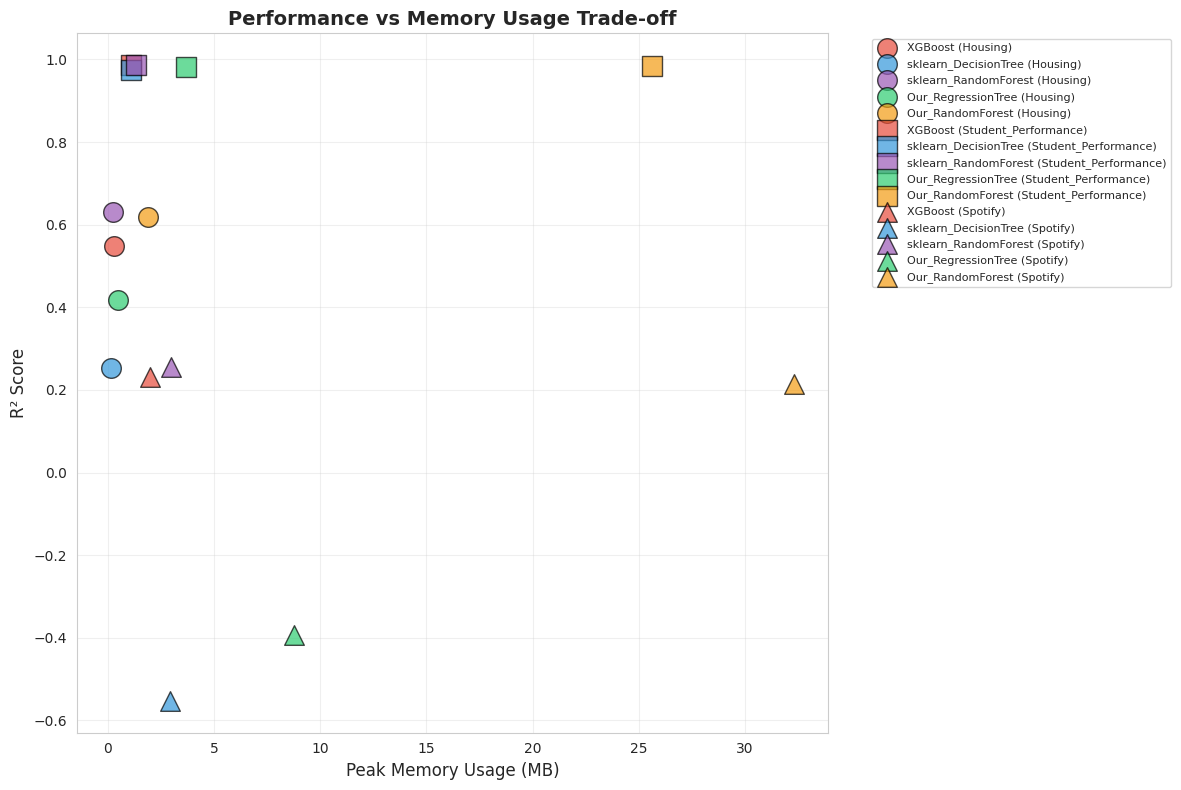

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

for dataset, marker in zip(datasets, markers):
    data = df[df['dataset'] == dataset]
    for estimator in data['estimator'].unique():
        est_data = data[data['estimator'] == estimator]
        ax.scatter(est_data['cv_memory_mb'], est_data['r2_mean'], 
                  s=200, alpha=0.7, marker=marker,
                  color=colors_map.get(estimator, '#95a5a6'),
                  label=f'{estimator} ({dataset})',
                  edgecolors='black', linewidths=1)

ax.set_xlabel('peak memory usage (MB)', fontsize=12)
ax.set_ylabel('R² score', fontsize=12)
ax.set_title('performance vs memory usage', fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)

plt.tight_layout()
plt.savefig('../results/performance_vs_memory.png', dpi=300, bbox_inches='tight')
plt.show()

## our implementations vs sklearn

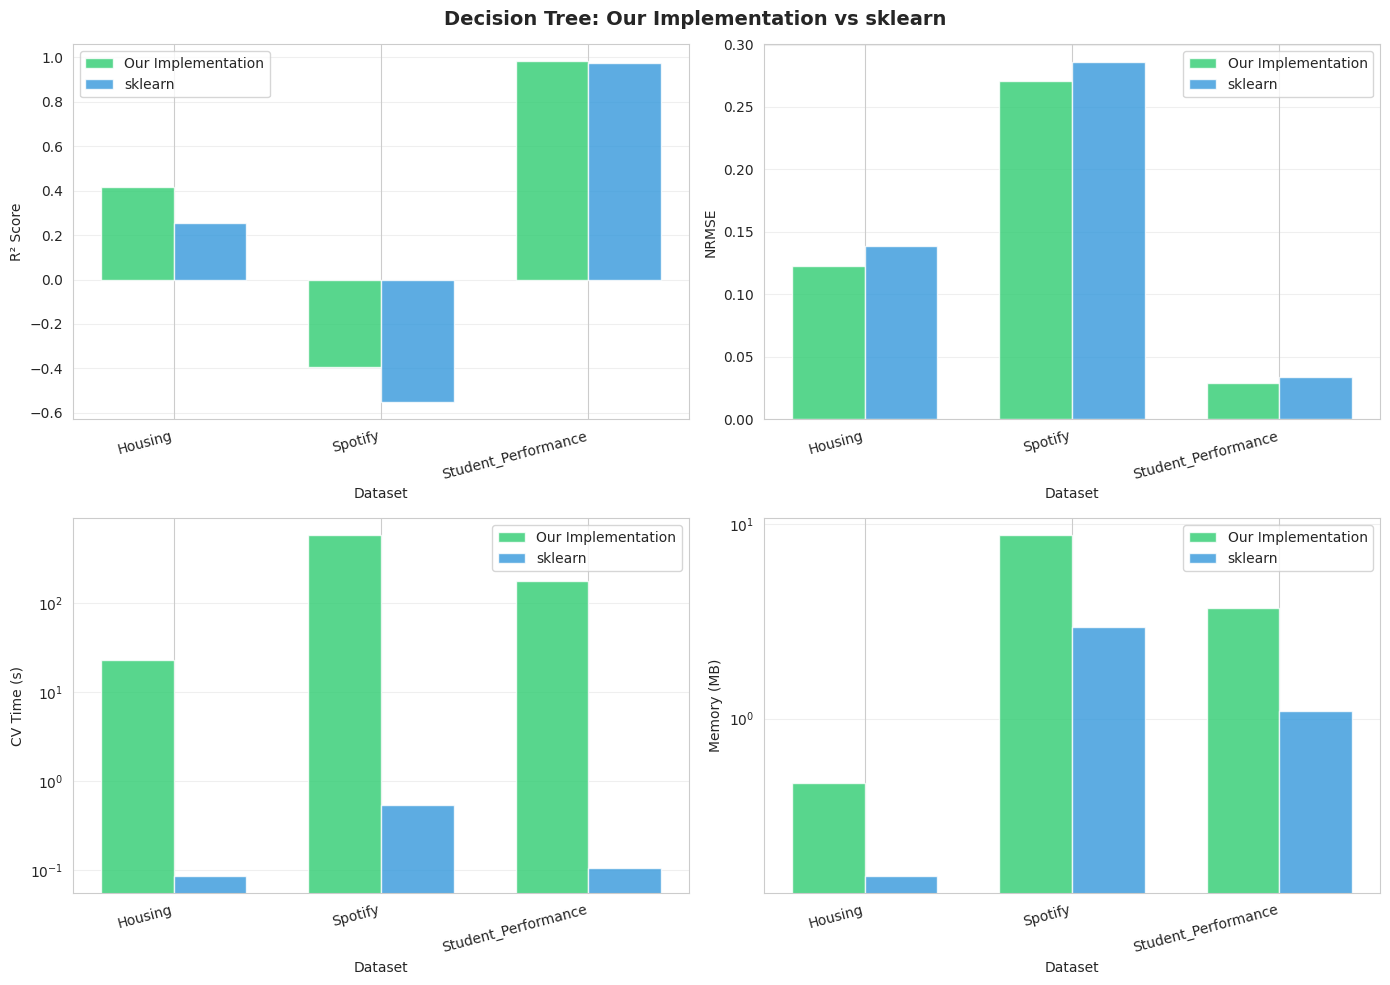

In [ ]:
tree_comparison = df[df['estimator'].str.contains('Tree')].copy()
tree_comparison['implementation'] = tree_comparison['estimator'].apply(lambda x: 'our' if 'Our' in x else 'sklearn')

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

metrics = [('r2_mean', 'R² score', True), ('nrmse', 'NRMSE', False), 
           ('cv_time_seconds', 'CV time (s)', False), ('cv_memory_mb', 'memory (MB)', False)]

for ax, (metric, title, higher_better) in zip(axes.flat, metrics):
    data_pivot = tree_comparison.pivot_table(values=metric, index='dataset', columns='implementation')
    
    x = np.arange(len(data_pivot.index))
    width = 0.35
    
    bars1 = ax.bar(x - width/2, data_pivot['our'], width, label='our implementation', color='#2ecc71', alpha=0.8)
    bars2 = ax.bar(x + width/2, data_pivot['sklearn'], width, label='sklearn', color='#3498db', alpha=0.8)
    
    ax.set_ylabel(title)
    ax.set_xlabel('dataset')
    ax.set_xticks(x)
    ax.set_xticklabels(data_pivot.index, rotation=15, ha='right')
    ax.legend()
    ax.grid(axis='y', alpha=0.3)
    
    if metric in ['cv_time_seconds', 'cv_memory_mb']:
        ax.set_yscale('log')

plt.suptitle('decision tree: our implementation vs sklearn', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('../results/tree_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

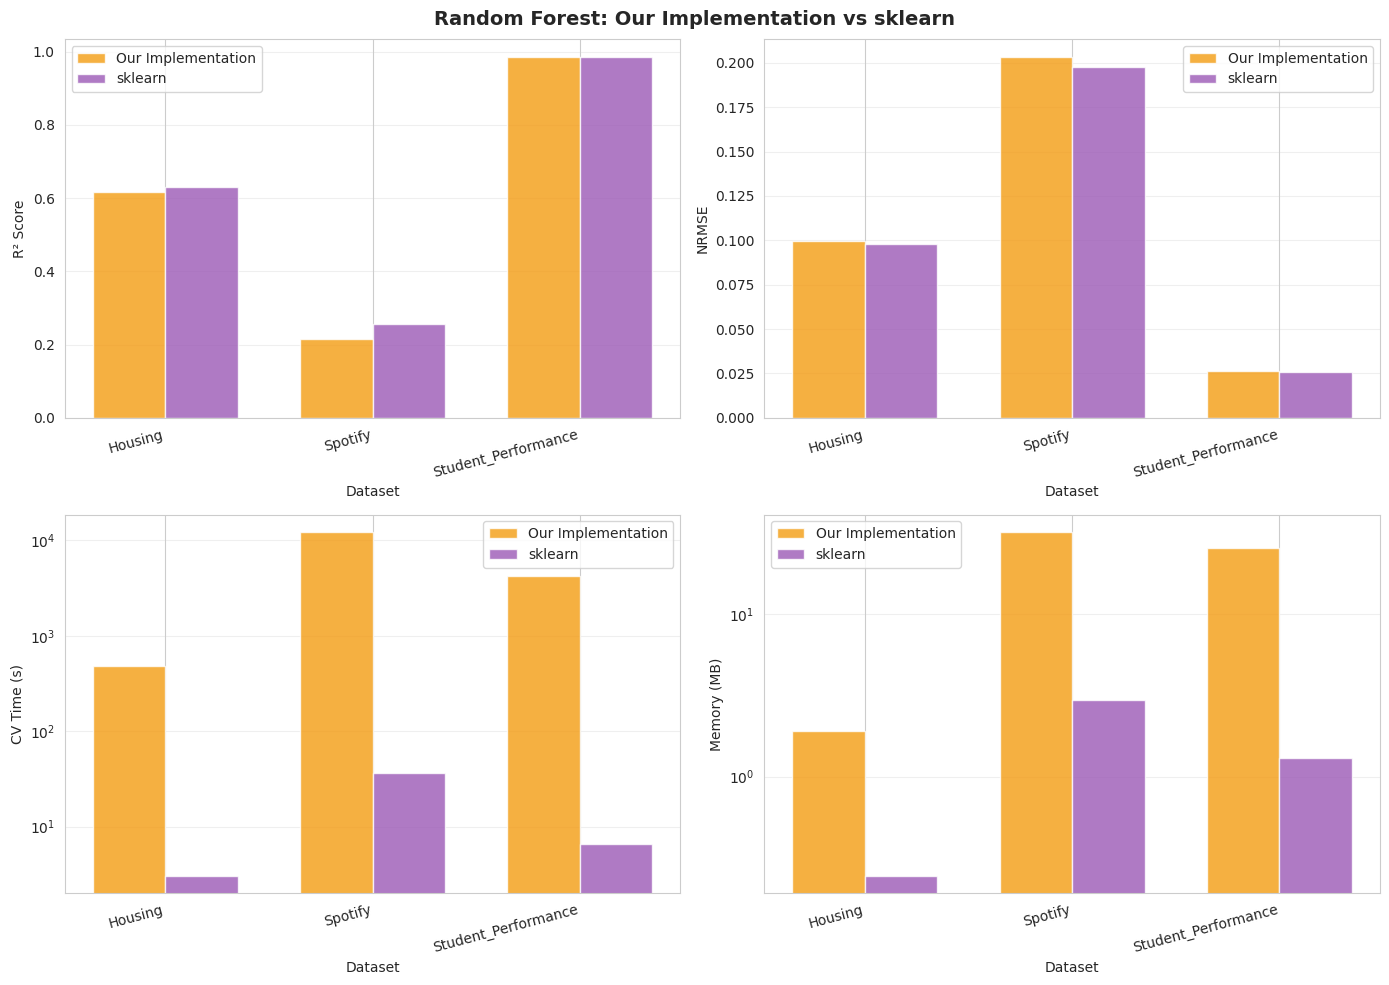

In [ ]:
rf_comparison = df[df['estimator'].str.contains('Forest')].copy()
rf_comparison['implementation'] = rf_comparison['estimator'].apply(lambda x: 'our' if 'Our' in x else 'sklearn')

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

for ax, (metric, title, higher_better) in zip(axes.flat, metrics):
    data_pivot = rf_comparison.pivot_table(values=metric, index='dataset', columns='implementation')
    
    x = np.arange(len(data_pivot.index))
    width = 0.35
    
    bars1 = ax.bar(x - width/2, data_pivot['our'], width, label='our implementation', color='#f39c12', alpha=0.8)
    bars2 = ax.bar(x + width/2, data_pivot['sklearn'], width, label='sklearn', color='#9b59b6', alpha=0.8)
    
    ax.set_ylabel(title)
    ax.set_xlabel('dataset')
    ax.set_xticks(x)
    ax.set_xticklabels(data_pivot.index, rotation=15, ha='right')
    ax.legend()
    ax.grid(axis='y', alpha=0.3)
    
    if metric in ['cv_time_seconds', 'cv_memory_mb']:
        ax.set_yscale('log')

plt.suptitle('random forest: our implementation vs sklearn', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('../results/rf_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

## error analysis

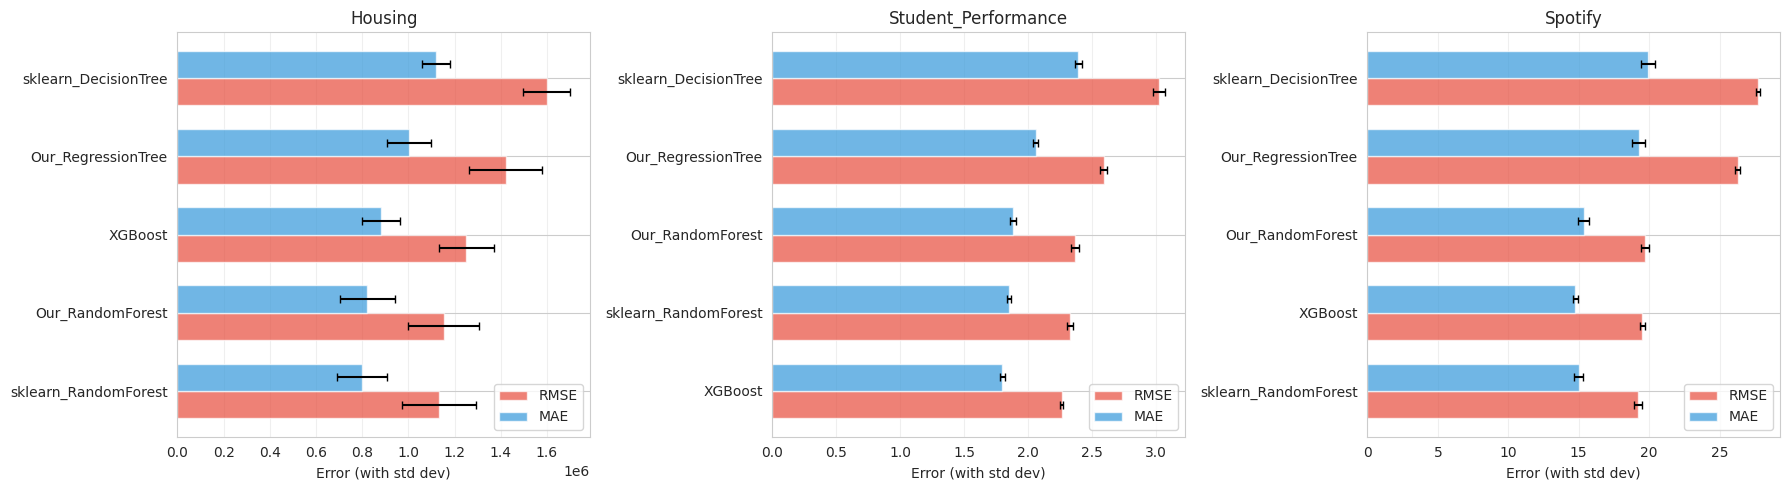

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for idx, dataset in enumerate(df['dataset'].unique()):
    data = df[df['dataset'] == dataset]
    ax = axes[idx]
    
    data_sorted = data.sort_values('rmse_mean', ascending=True)
    
    x = np.arange(len(data_sorted))
    width = 0.35
    
    bars1 = ax.barh(x - width/2, data_sorted['rmse_mean'], width, 
                    xerr=data_sorted['rmse_std'], capsize=3,
                    label='RMSE', color='#e74c3c', alpha=0.7)
    
    bars2 = ax.barh(x + width/2, data_sorted['mae_mean'], width,
                    xerr=data_sorted['mae_std'], capsize=3,
                    label='MAE', color='#3498db', alpha=0.7)
    
    ax.set_yticks(x)
    ax.set_yticklabels(data_sorted['estimator'])
    ax.set_xlabel('error (with std dev)')
    ax.set_title(f'{dataset}')
    ax.legend()
    ax.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.savefig('../results/error_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

## overall rankings

Overall Rankings (1 = best):
                      r2_mean  nrmse  cv_time_seconds  cv_memory_mb  \
estimator                                                             
sklearn_RandomForest        1      1                3             3   
XGBoost                     3      3                2             1   
sklearn_DecisionTree        5      5                1             2   
Our_RandomForest            2      2                5             5   
Our_RegressionTree          4      4                4             4   

                      average_rank  
estimator                           
sklearn_RandomForest          2.00  
XGBoost                       2.25  
sklearn_DecisionTree          3.25  
Our_RandomForest              3.50  
Our_RegressionTree            4.00  



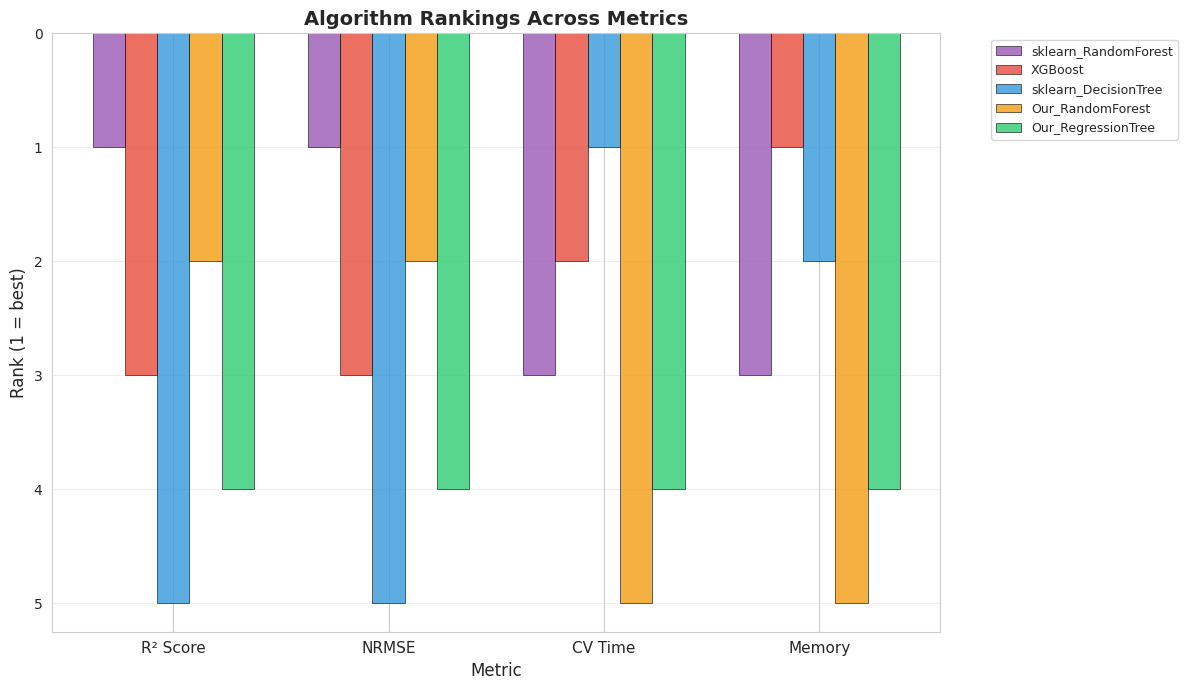

In [ ]:
ranking_metrics = ['r2_mean', 'nrmse', 'cv_time_seconds', 'cv_memory_mb']

rankings = pd.DataFrame()
for metric in ranking_metrics:
    ascending = False if metric == 'r2_mean' else True
    temp = df.groupby('estimator')[metric].mean().sort_values(ascending=ascending)
    temp_ranks = pd.Series(range(1, len(temp) + 1), index=temp.index)
    rankings[metric] = temp_ranks

rankings['average_rank'] = rankings.mean(axis=1)
rankings = rankings.sort_values('average_rank')

print("overall rankings (1 = best):")
print(rankings)
print("\n" + "="*60)

fig, ax = plt.subplots(figsize=(12, 7))

x = np.arange(len(ranking_metrics))
width = 0.15

for i, estimator in enumerate(rankings.index):
    values = [rankings.loc[estimator, metric] for metric in ranking_metrics]
    color = colors_map.get(estimator, '#95a5a6')
    ax.bar(x + i * width, values, width, label=estimator, color=color, alpha=0.8, edgecolor='black', linewidth=0.5)

ax.set_xlabel('metric', fontsize=12)
ax.set_ylabel('rank (1 = best)', fontsize=12)
ax.set_title('algorithm rankings across metrics', fontsize=14, fontweight='bold')
ax.set_xticks(x + width * 2)
ax.set_xticklabels(['R² score', 'NRMSE', 'CV time', 'memory'], fontsize=11)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=9)
ax.grid(axis='y', alpha=0.3)
ax.invert_yaxis()

plt.tight_layout()
plt.savefig('../results/overall_rankings.png', dpi=300, bbox_inches='tight')
plt.show()

## heatmap summary

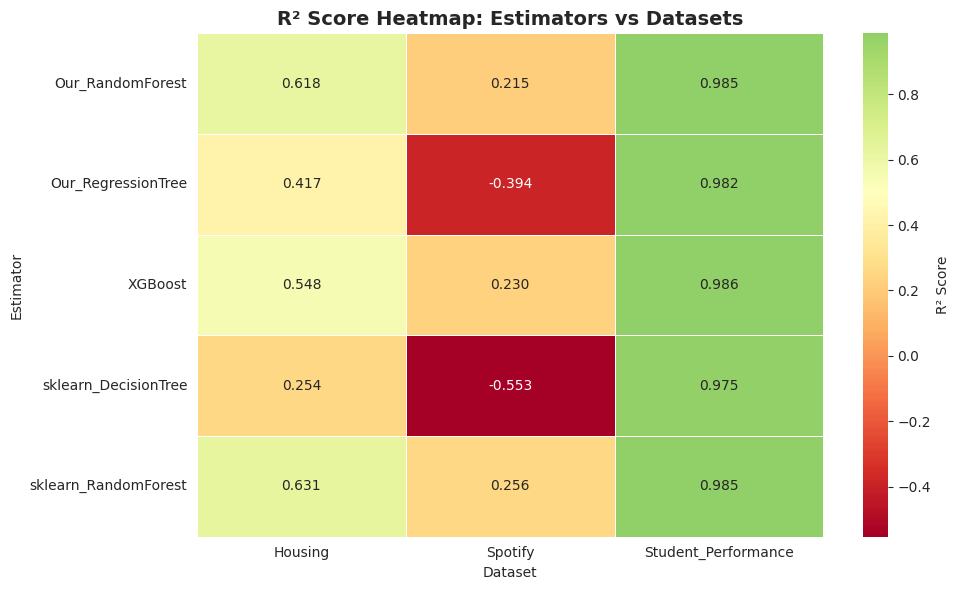

In [ ]:
pivot_r2 = df.pivot_table(values='r2_mean', index='estimator', columns='dataset')

fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(pivot_r2, annot=True, fmt='.3f', cmap='RdYlGn', center=0.5, 
            cbar_kws={'label': 'R² score'}, linewidths=0.5, ax=ax)
ax.set_title('R² score heatmap: estimators vs datasets', fontsize=14, fontweight='bold')
ax.set_xlabel('dataset')
ax.set_ylabel('estimator')
plt.tight_layout()
plt.savefig('../results/r2_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

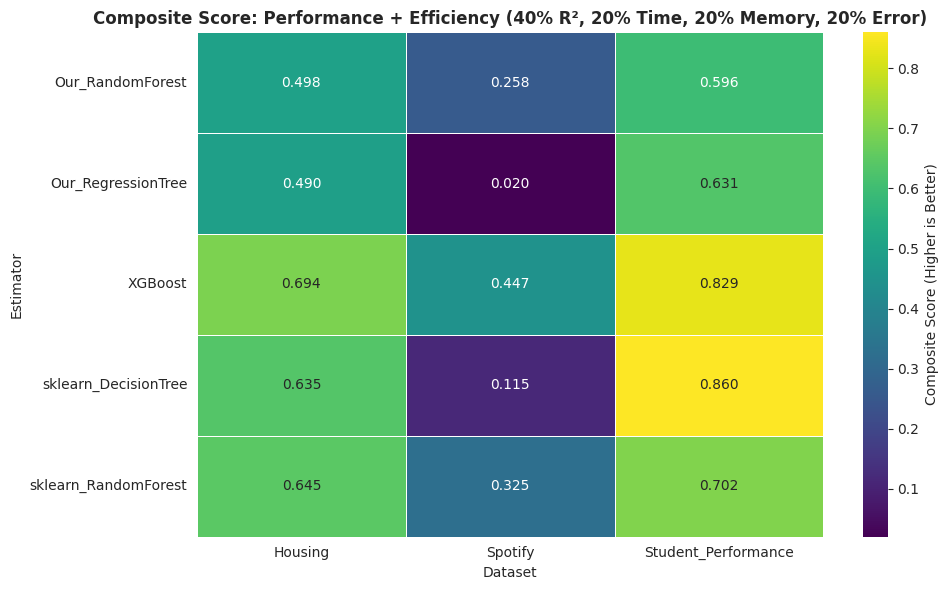


Best overall estimator per dataset (composite score):
                dataset             estimator  composite_score
0               Housing               XGBoost         0.693646
10              Spotify               XGBoost         0.447197
6   Student_Performance  sklearn_DecisionTree         0.859869


In [ ]:
# composite score: 40% performance, 60% efficiency
df_norm = df.copy()
df_norm['r2_norm'] = df_norm['r2_mean']
df_norm['time_norm'] = 1 / (1 + df_norm['cv_time_seconds'])
df_norm['memory_norm'] = 1 / (1 + df_norm['cv_memory_mb'])
df_norm['nrmse_norm'] = 1 / (1 + df_norm['nrmse'])

df_norm['composite_score'] = (df_norm['r2_norm'] * 0.4 + 
                               df_norm['time_norm'] * 0.2 + 
                               df_norm['memory_norm'] * 0.2 + 
                               df_norm['nrmse_norm'] * 0.2)

pivot_composite = df_norm.pivot_table(values='composite_score', index='estimator', columns='dataset')

fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(pivot_composite, annot=True, fmt='.3f', cmap='viridis', 
            cbar_kws={'label': 'composite score (higher is better)'}, 
            linewidths=0.5, ax=ax)
ax.set_title('composite score: 40% R², 20% time, 20% memory, 20% error', 
             fontsize=12, fontweight='bold')
ax.set_xlabel('dataset')
ax.set_ylabel('estimator')
plt.tight_layout()
plt.savefig('../results/composite_score_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nbest overall estimator per dataset:")
print(df_norm.loc[df_norm.groupby('dataset')['composite_score'].idxmax()][['dataset', 'estimator', 'composite_score']])